<h1 style='color:black' align = 'center'>Twitter Sentiment Analysis Project</h1>

<h2 style = 'color:blue'>Import the libraries</h2>

In [1]:
import string
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

<h2 style = 'color:blue'>Load the Dataset</h2>

In [2]:
headers = ['TweetID', 'Location', 'Sentiment', 'OriginalTweet']

In [3]:
train_df = pd.read_csv('e:/twitter_training.csv', sep = ',', names = headers)

In [4]:
train_df.head()

,TweetID,Location,Sentiment,OriginalTweet
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [5]:
valid_df = pd.read_csv('e:/twitter_validation.csv', sep = ',', names = headers)

In [6]:
valid_df.head()

,TweetID,Location,Sentiment,OriginalTweet
0,3364,Facebook,Irrelevant,I mentioned on Facebook that I was struggling ...
1,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
3,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,4433,Google,Neutral,Now the President is slapping Americans in the...


In [7]:
train_df = train_df.drop(train_df.iloc[:, :2], axis = 1)

In [8]:
train_df.head()

,Sentiment,OriginalTweet
0,Positive,im getting on borderlands and i will murder yo...
1,Positive,I am coming to the borders and I will kill you...
2,Positive,im getting on borderlands and i will kill you ...
3,Positive,im coming on borderlands and i will murder you...
4,Positive,im getting on borderlands 2 and i will murder ...


In [9]:
valid_df = valid_df.drop(valid_df.iloc[:, :2], axis = 1)

In [10]:
valid_df.head()

,Sentiment,OriginalTweet
0,Irrelevant,I mentioned on Facebook that I was struggling ...
1,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
2,Negative,@Microsoft Why do I pay for WORD when it funct...
3,Negative,"CSGO matchmaking is so full of closet hacking,..."
4,Neutral,Now the President is slapping Americans in the...


In [11]:
train_df['Sentiment'].value_counts()

Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: Sentiment, dtype: int64

In [12]:
valid_df['Sentiment'].value_counts()

Neutral       285
Positive      277
Negative      266
Irrelevant    172
Name: Sentiment, dtype: int64

In [13]:
train_df.duplicated().sum()

4909

In [14]:
train_df = train_df.drop_duplicates()

In [15]:
valid_df.duplicated().sum()

1

In [16]:
valid_df = valid_df.drop_duplicates()

<h2 style='color:blue'>Bar Plot of Sentiment Values</h2>

In [17]:
def BarPlot(X):
    %matplotlib inline
    plt.figure(figsize = (6, 6), dpi = 100)

    plt.style.use('ggplot')
    sns.set(style ='whitegrid')
    
    sns.countplot(x = X['Sentiment'], palette = {'Positive':'green', 'Neutral':'yellow', 'Negative':'red', 'Irrelevant':'blue'})
    
    plt.title('Bar Plot of Sentiment Analysis', fontdict = {'fontname' : 'Bookman Old Style', 'fontsize' : 15})
    
    plt.show()

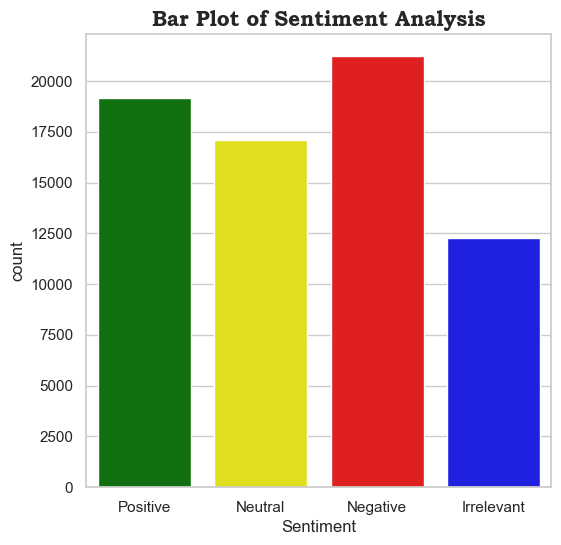

In [18]:
BarPlot(train_df)

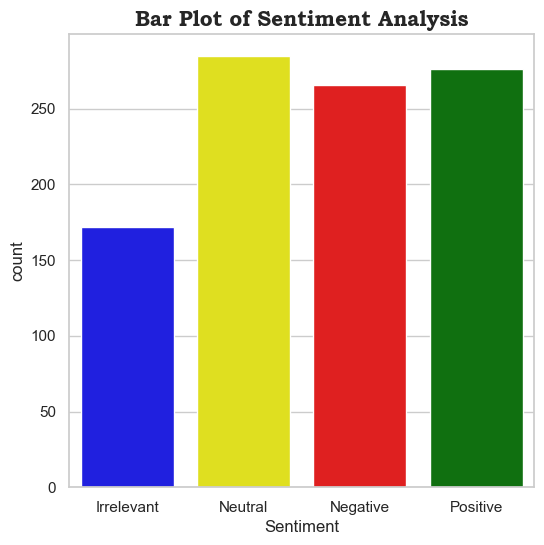

In [19]:
BarPlot(valid_df)

<h2 style='color:blue'>Pie Chart of Sentiment Analysis</h2>

In [20]:
def PieChart(X):    
    %matplotlib inline
    plt.figure(figsize = (12, 9), dpi = 100)

    plt.style.use('ggplot')

    Negative = X['Sentiment'][X.Sentiment == 'Negative'].count()
    Positive = X['Sentiment'][X.Sentiment == 'Positive'].count()
    Neutral = X['Sentiment'][X.Sentiment == 'Neutral'].count()
    Irrelevant = X['Sentiment'][X.Sentiment == 'Irrelevant'].count()

    labels = ['Negative','Positive','Neutral','Irrelevant']
    colors = ['red', 'green', 'yellow', 'blue']

    plt.pie([Negative, Positive, Neutral, Irrelevant], labels = labels, colors = colors, autopct = '%.2f %%')

    plt.title('Pie Chart of Sentiment Values', fontdict = {'fontname' : 'Bookman Old Style', 'fontsize' : 15})
    plt.legend(loc = 'upper left')
    plt.show()

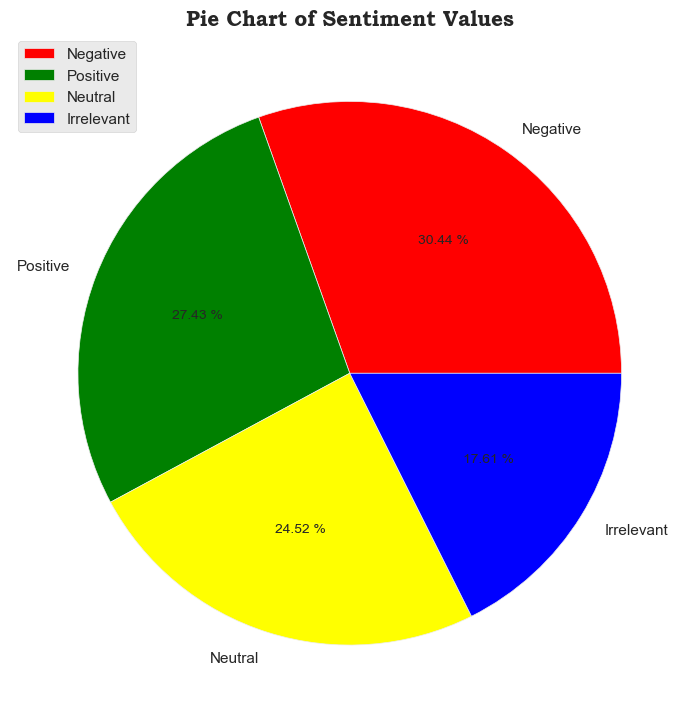

In [21]:
PieChart(train_df)

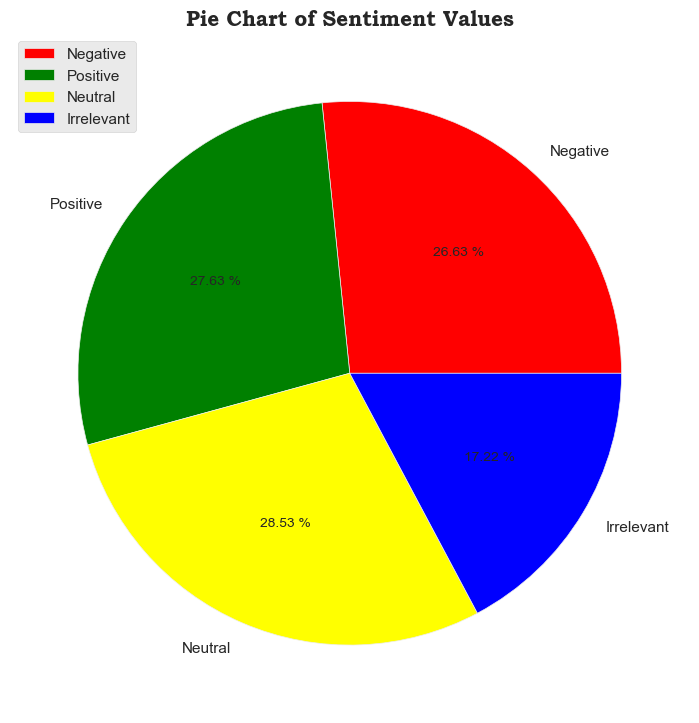

In [22]:
PieChart(valid_df)

<h2 style='color:blue'>Remove Null Values</h2>

In [23]:
train_df['OriginalTweet'].isnull().sum()

4

In [24]:
train_df.dropna(axis = 0, inplace = True)

In [25]:
valid_df['OriginalTweet'].isnull().sum()

0

<h2 style='color:blue'>Remove '@' signs</h2>

In [26]:
X_train = train_df['OriginalTweet'].apply(lambda x : x.replace('@', ' '))

In [27]:
X_valid = valid_df['OriginalTweet'].apply(lambda x : x.replace('@', ' '))

<h2 style='color:blue'>Remove Stop Words</h2>

In [28]:
from nltk.corpus import stopwords
english_stop_words = stopwords.words('english')

In [29]:
def remove_stop_words(X):
    removed_stop_words = []
    for item in X:
        removed_stop_words.append(' '.join([word for word in item.split() if word not in english_stop_words]))
    
    return removed_stop_words

In [30]:
X_train = remove_stop_words(X_train)

In [31]:
X_valid = remove_stop_words(X_valid)

<h2 style='color:blue'>Scikit-learn Libraries</h2>

In [32]:
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

<h2 style='color:blue'>Encoding the words of all strings</h2>

In [ ]:
cv = CountVectorizer(stop_words = 'english', max_df = 2000, ngram_range = (1, 3))

X_train = cv.fit_transform(X_train)
X_valid = cv.transform(X_valid)

In [33]:
tfv = TfidfVectorizer(stop_words = 'english', max_df = 2000, ngram_range = (1, 3))

X_train = tfv.fit_transform(X_train)
X_valid = tfv.transform(X_valid)

In [34]:
LE = LabelEncoder()

y_train = LE.fit_transform(train_df.iloc[:, 0])
y_valid = LE.transform(valid_df.iloc[:, 0])

<h2 style='color:blue'>Difference between SVM, Logistic Regression, Multinomial NB, Decision Tree & Random Forest</h2>

<h3 style='color:purple'>Support Vector Machine</h3>

In [35]:
from sklearn.svm import LinearSVC

svc = LinearSVC(loss = 'squared_hinge', random_state = 0)
svc.fit(X_train, y_train)

svc_valid_score = svc.score(X_valid, y_valid)
print("Test Set Accuracy using SVC:", svc_valid_score * 100)

Test Set Accuracy using SVC: 98.5985985985986


<h3 style='color:purple'>Logistic Regression</h3>

In [36]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(solver = 'liblinear', max_iter = 200, random_state = 0)
lr.fit(X_train, y_train)

lr_valid_score = lr.score(X_valid, y_valid)
print("Test Set Accuracy using Logistic Regression:", lr_valid_score * 100)

Test Set Accuracy using Logistic Regression: 96.69669669669669


<h3 style='color:purple'>Multinomial Naive Bayes</h3>

In [37]:
from sklearn.naive_bayes import MultinomialNB

multi_nb = MultinomialNB()
multi_nb.fit(X_train, y_train)

multi_nb_valid_score = multi_nb.score(X_valid, y_valid)
print('Test Set Accuracy using Multinomial NB:', multi_nb_valid_score * 100)

Test Set Accuracy using Multinomial NB: 97.3973973973974


<h3 style='color:purple'>Decision Tree</h3>

In [38]:
from sklearn.tree import DecisionTreeClassifier

dtree_clf = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dtree_clf.fit(X_train, y_train)

dtree_clf_valid_score = dtree_clf.score(X_valid, y_valid)
print('Test Set Accuracy using Decision Tree:', dtree_clf_valid_score * 100)

Test Set Accuracy using Decision Tree: 90.990990990991


<h3 style='color:purple'>Random Forest</h3>

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 500, criterion = 'entropy', random_state = 0)
rf_clf.fit(X_train, y_train)

rf_clf_valid_score = rf_clf.score(X_valid, y_valid)
print('Test Set Accuracy using Random Forest:', rf_clf_valid_score * 100)

<h2 style='color:blue'>Confusion Matrix</h2>

In [39]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(X_valid)
cm = confusion_matrix(y_valid, y_pred)
cm

array([[170,   1,   0,   1],
       [  0, 261,   2,   3],
       [  0,   0, 282,   3],
       [  1,   2,   1, 272]], dtype=int64)

Text(48.5, 0.5, 'Actual Value')

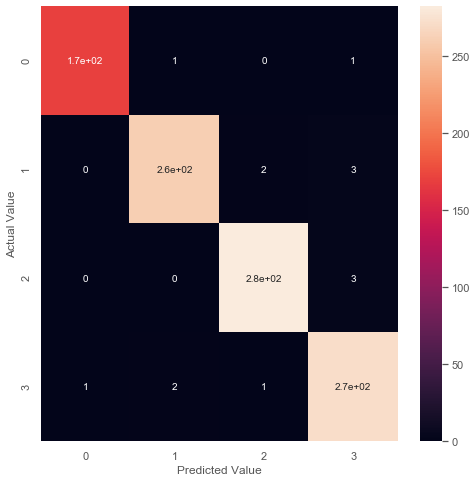

In [40]:
plt.figure(figsize = (8, 8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

<h2 style='color:blue'>Accuracy Score</h2>

In [41]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_valid, y_pred)
display(accuracy * 100)

98.5985985985986

<h2 style='color:blue'>Classification Report</h2>

In [42]:
from sklearn.metrics import classification_report

matrix = classification_report(y_valid, y_pred)
print(matrix)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       172
           1       0.99      0.98      0.98       266
           2       0.99      0.99      0.99       285
           3       0.97      0.99      0.98       276

    accuracy                           0.99       999
   macro avg       0.99      0.99      0.99       999
weighted avg       0.99      0.99      0.99       999



<h2 style='color:blue'>Predicted Value Using Best Model Score</h2>

In [ ]:
# for countvectorizer use svc
# for tfidfvectorizer use svc

text = input("Enter Your Own Text: ")
text = text.replace('@', ' ')
updated_text = remove_stop_words([text])
text_ = cv.transform(updated_text)

pred_text = svc.predict(text_)
pred_output = LE.inverse_transform(pred_text)

print("The Sentiment of your text is:", pred_output[0])

In [43]:
# for countvectorizer use svc
# for tfidfvectorizer use svc

text = input("Enter Your Own Text: ")
text = text.replace('@', ' ')
updated_text = remove_stop_words([text])
text_ = tfv.transform(updated_text)

pred_text = svc.predict(text_)
pred_output = LE.inverse_transform(pred_text)

print("The Sentiment of your text is:", pred_output[0])

Enter Your Own Text: happy birthday red dead redemption that shit changed my life what a crazy experience
The Sentiment of your text is: Positive
